#### Setting the warning off

In [58]:
options(warn = -1)

#### Installing the packages

In [59]:
install.packages('IRkernel')
install.packages("readxl")
install.packages("ggplot2")
library(ggplot2)
library(readxl)

package 'IRkernel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\enasi\AppData\Local\Temp\RtmpMxtYHi\downloaded_packages


also installing the dependency 'rlang'





  There are binary versions available but the source versions are later:
        binary source needs_compilation
rlang   0.4.11 0.4.12              TRUE
ggplot2  3.3.3  3.3.5             FALSE

  Binaries will be installed
package 'rlang' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\enasi\AppData\Local\Temp\RtmpMxtYHi\downloaded_packages


installing the source package 'ggplot2'




#### Importing the dataset

In [60]:
regdata = readxl::read_excel('data for piecewise regression.xlsx')

### Creating a change variable which reflect dummy variable effects

In [61]:
regdata$dum = regdata$difference * regdata$diff2

In [62]:
attach(regdata)

The following objects are masked from regdata (pos = 4):

    diff2, difference, dum, x, y


The following objects are masked from regdata (pos = 5):

    diff2, difference, dum, x, y


The following objects are masked from regdata (pos = 6):

    diff2, difference, x, y




#### Choosing Values as:
    x = Total Cost
    y = Total Output
    difference = (y - y^(k))  where y^(k) is 5500
    k = 0 if Previous Technology
    k = 1 if New Technology
    diff2 = dummay variable 
        diff2 = 0 if y <= 5500
        diff2 = 1 if y >5500
    dum = dummy variable diff2 effect on y

In [63]:
str(regdata)

Classes 'tbl_df', 'tbl' and 'data.frame':	10 obs. of  5 variables:
 $ x         : num  256 414 634 778 1003 ...
 $ y         : num  1000 2000 3000 4000 5000 6000 7000 8000 9000 10000
 $ difference: num  -4500 -3500 -2500 -1500 -500 500 1500 2500 3500 4500
 $ diff2     : num  0 0 0 0 0 1 1 1 1 1
 $ dum       : num  0 0 0 0 0 500 1500 2500 3500 4500


In [64]:
summary(regdata)

       x              y           difference        diff2          dum      
 Min.   : 256   Min.   : 1000   Min.   :-4500   Min.   :0.0   Min.   :   0  
 1st Qu.: 670   1st Qu.: 3250   1st Qu.:-2250   1st Qu.:0.0   1st Qu.:   0  
 Median :1421   Median : 5500   Median :    0   Median :0.5   Median : 250  
 Mean   :1508   Mean   : 5500   Mean   :    0   Mean   :0.5   Mean   :1250  
 3rd Qu.:2338   3rd Qu.: 7750   3rd Qu.: 2250   3rd Qu.:1.0   3rd Qu.:2250  
 Max.   :2914   Max.   :10000   Max.   : 4500   Max.   :1.0   Max.   :4500  

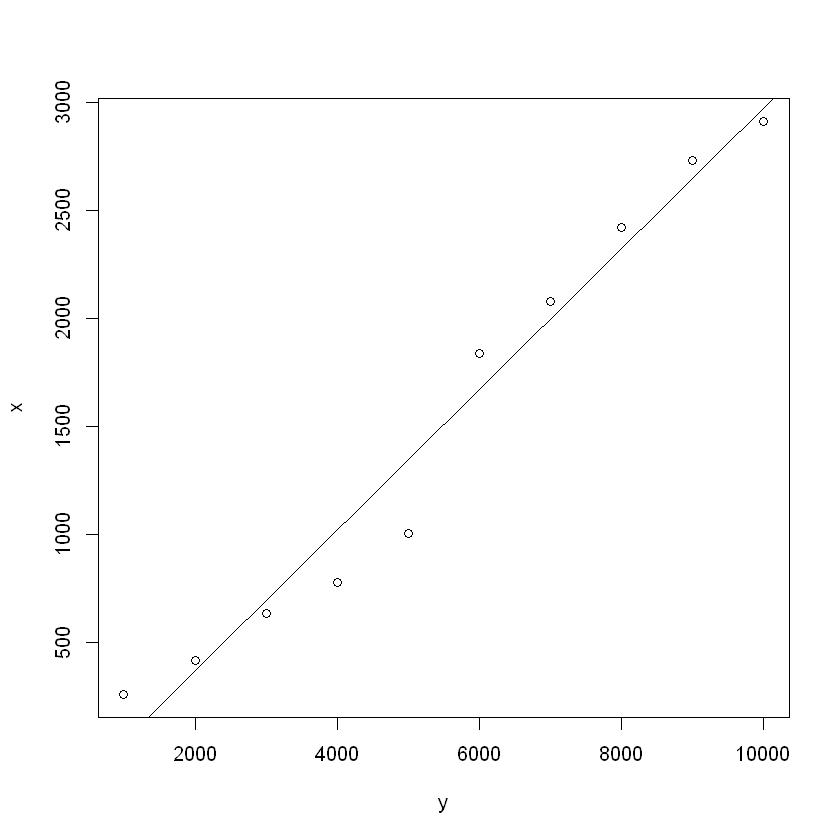

In [65]:
plot(y,x)
abline(lm(x~y))

# Performing a Linear Regression

In [66]:
lmfit = lm(x ~ y + dum)
summary(lmfit)


Call:
lm(formula = x ~ y + dum)

Residuals:
    Min      1Q  Median      3Q     Max 
-246.91 -132.01   19.15  116.81  262.71 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -145.71667  176.73415  -0.824 0.436847    
y              0.27913    0.04601   6.067 0.000507 ***
dum            0.09450    0.08255   1.145 0.289950    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 184.6 on 7 degrees of freedom
Multiple R-squared:  0.9737,	Adjusted R-squared:  0.9662 
F-statistic: 129.6 on 2 and 7 DF,  p-value: 2.948e-06


#### Plotting all plots of linear regression fit

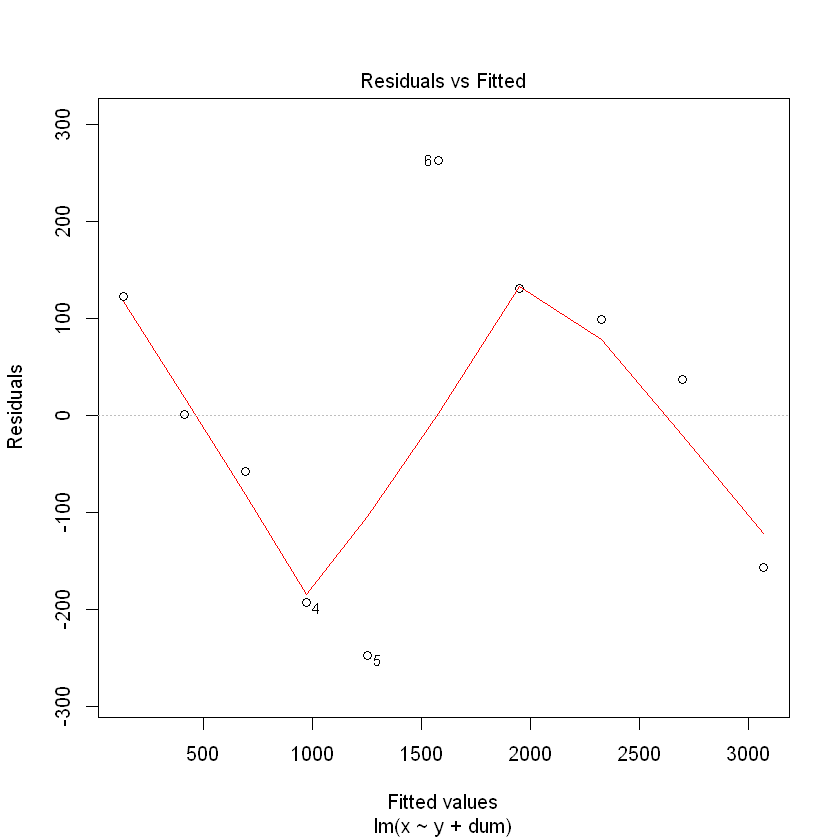

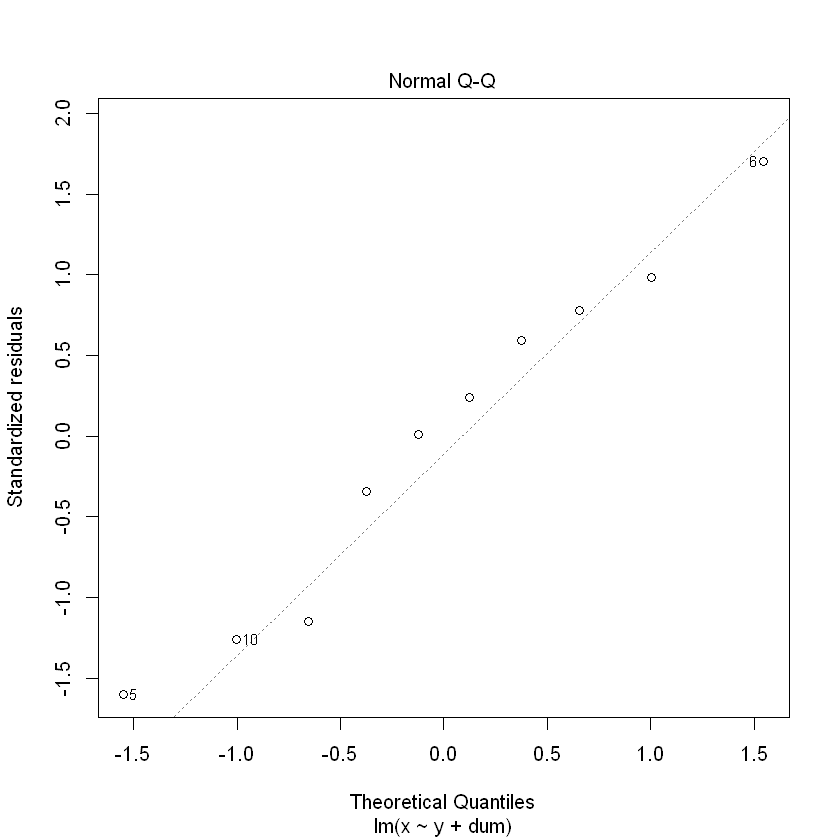

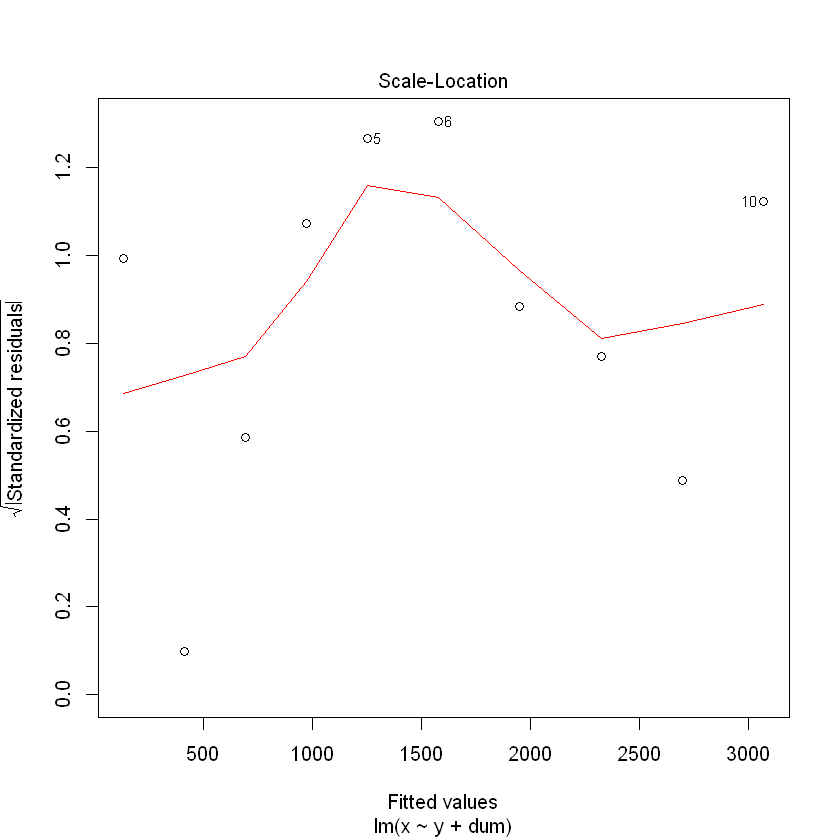

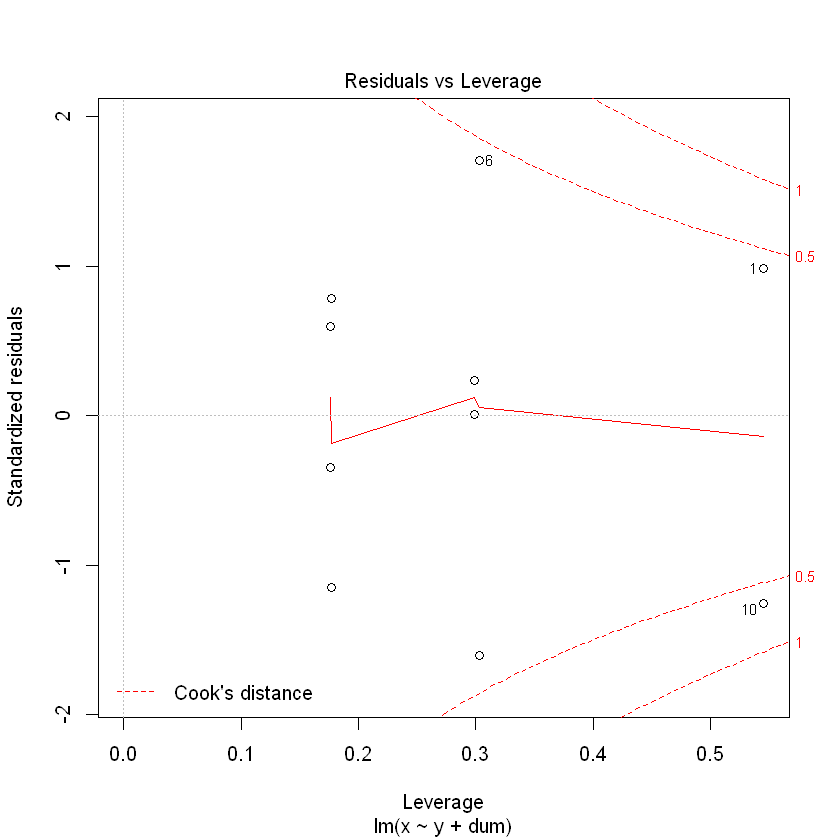

In [67]:
plot(lmfit)

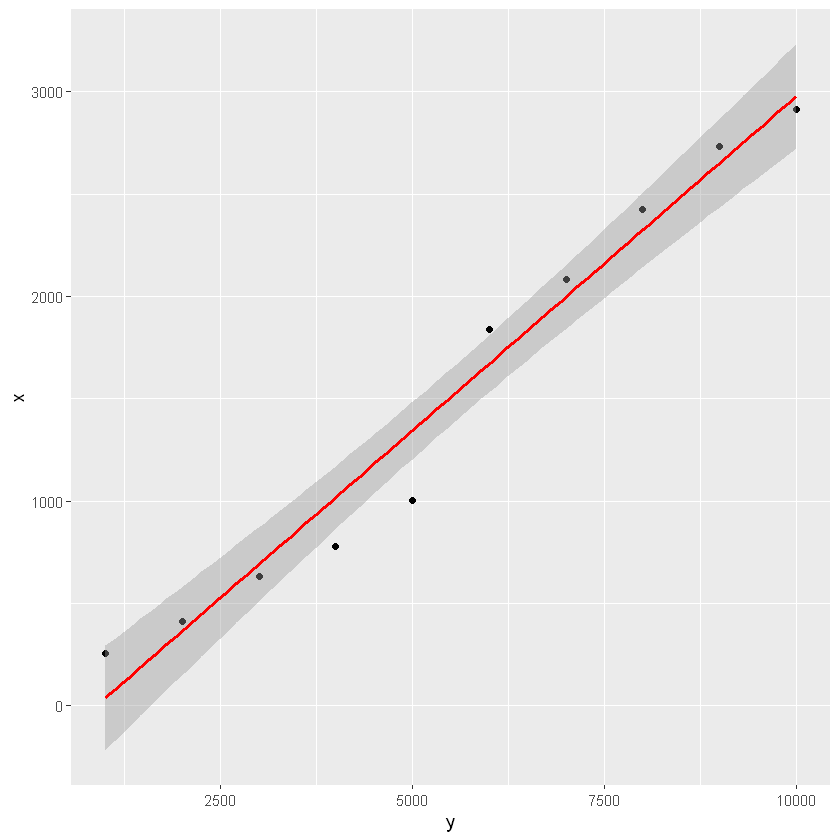

In [68]:
ggplot(regdata, aes(x = y, y = x)) + geom_point() + 
geom_smooth(method = lm, color= "red")

In [69]:
anova(lmfit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
y,1,8787993.65,8787993.65,257.905284,8.820052e-07
dum,1,44651.25,44651.25,1.310401,2.899495e-01
Residuals,7,238521.50,34074.50,NA,NA


# Thank you 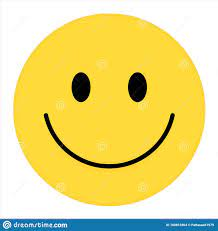

In [76]:
file('Piecewise linear regression in R within Jupyter (Spline reg).ipynb')

A connection with                                                                                
description "Piecewise linear regression in R within Jupyter (Spline reg).ipynb"
class       "file"                                                              
mode        "r"                                                                 
text        "text"                                                              
opened      "closed"                                                            
can read    "yes"                                                               
can write   "yes"                                                               